# Analyzing FIFA World Cup Data

## Introduction
This project provides an analysys for data set of the FIFA World Cup. As it has a big history and mega huge amount of history I decided to work with this data set. The FIFA World Cup is the premier international soccer competition. The World Cup is held by the governing body of world football - FIFA, and the men's national teams of the FIFA member countries of all continents can participate in it.The final tournaments of the world championships are held every 4 years. Why I have interested on it? 
Main reason for that is by analysing this data set I want to make a prediction to winner of further competition. For that I am planning to consider main factors including the population of the country, the international ranking of the team, the average age of the players, the number of players who have played in the UEFA Champions League, the nationality of the coach and an incredible number of other variables are taken into account.


## Objectives
1. To evaluate the development process of national football teams across continents over different periods of time
2. Focus on the personal statistics of the players in the championship and draw up several rating charts for national teams and players
3. As a result of the analysis, make a forecast for the winner and the owners of the remaining prizes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

I used 2 datasets about FIFA World Cup. First one is dataset of World Cup Matches, which have data about results of every match,home team goals, away team goals,attendance and referee and their assistants. Second dataset is about separate championates, like total matches played, total goals scored, total teams participated.

In [3]:

dr=pd.read_csv("WorldCupMatches.csv")
dr

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dt=pd.read_csv("WorldCups.csv")


## Corrections after part 1 recommendations

In the first part I did not used data description. So, on my further works, for answering to my research questions I will use data description and data cleaning and remain only data that I need from tables 

In [5]:
dr.dropna()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


## Research questions
1. Which national teams are considered to be fovarites of the world championship according to their goals?
2. Are there differences between the data of the world championships of the 20th and 21st century?
3. How does the attendence of people has changed by development of World Cup?
4. Does it affect the home team to win the league match?
5. Which referees have judged the World Cup more than others?

### Research question 1

#### Which national teams are considered to be fovarites of the World Cup according to their goals?

This research question is identifying Top participants of World Cup by their goals scored at several matches.Firstly, I realized that on my table there are data about goals that was scored at home and away by national teams. 
So, I need to sum this two values in order to find total goals of national teams.It means that from the table I need 4 columns: "Home Team Name", "Home Team Goals", "Away Team Name", "Away Team Goals". 


In [6]:
scoredathome = dr.groupby('Home Team Name')['Home Team Goals'].sum().reset_index() ## counts how many goals have been scored by home teams
scoredathome.columns = ['country','home_goal'] ## divide it by columns 
scoredataway = dr.groupby('Away Team Name')['Away Team Goals'].sum().reset_index() ## counts how many goals have been scored by away teams
scoredataway.columns = ['country','away_goal'] ## divide it by columns
homeandaway = pd.merge(scoredathome,scoredataway,on='country') ## we bring goals scored at home and away
homeandaway ['Total goals scored'] = homeandaway ['home_goal'] + homeandaway ['away_goal'] ## we need to sum goals to find total goals
homeandaway = homeandaway.sort_values(by='Total goals scored', ascending=False) ## I used this code to sort data by descending order

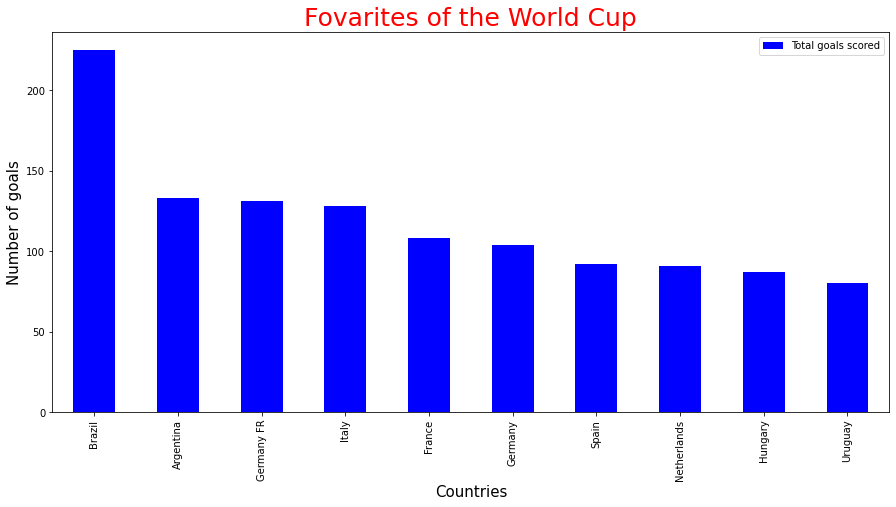

In [7]:

homeandaway[:10].plot(kind='bar',y='Total goals scored',x='country',figsize=(15,7),color='b') ## I chose type of chart as barchart and take only 10 country which considered to be fovarites
plt.xlabel('Countries',size='15') ## Label X axis as Countries
plt.ylabel('Number of goals',size='15') ## Label Y axis as Nuber of goals
plt.title('Fovarites of the World Cup',color='r',size='25') ## Title of my barchart and as usual used red color to title 
plt.show()

## Findings and comments to RQ1:

According to barchart following national teams are considered to be favorites of World Cup: Brazil,Argentina,Germany,Italy,France,Spain,Netherlands,Hungary and Uruguay. Brazil have won World Cup 5 times and footbal appeared in this country, that is why Brazil on the first place.Also, we can see big fluctuation after Brazil and gradualy decreases from Argentina to Uruguay.Next interesting thing that I found that only South American and European countries are considered to be favorites.

I have found one thing to consider from this barchart. On the the table goals scored by Germany national team and Germany FR are given sepately. I thought it is because of some historical changes of Germany. So, It will be better to sum data of Germany FR and Germany.



### Research question 3

#### How does the attendance of people has changed by development of World Cup?
So, this question is about number of fans who attend the matches. Firstly, I had to find average number of fans who attended the matches by the year. So, on my dataset it shows number of attended fans of every football match by the year. That is why I found mean attendance and marked it on "Y" axis and respectively year on "X" axis. I already did data preparation part for this question by dropping NaN values from table. I need only two columns from the table, there are "Year" and "Attendance" columns.

In [8]:
q3  = dr.groupby("Year")["Attendance"].mean().reset_index() ## data preparation using groupby Year and mean of Attendance 

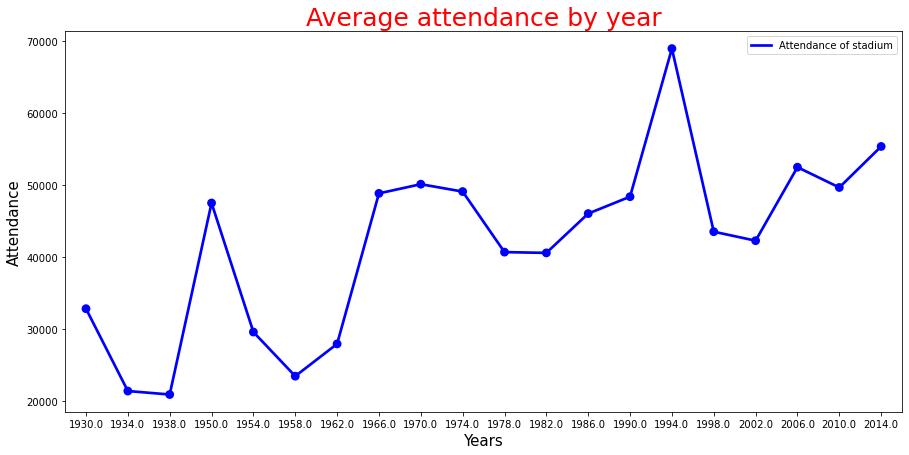

In [9]:
plt.figure(figsize=(15,7)) ## I used figsize 15,7 as standard for all my charts
ax = sns.pointplot(q3["Year"],q3["Attendance"],color="b") ## using seaborn i plotted Year and Attendence graph  
ax.set_xlabel('Years',size='15') ## label x axis as Years
plt.legend(["Attendance of stadium"])
ax.set_ylabel('Attendance',size='15')## label y axis as Attendance
plt.title("Average attendance by year",color='r',size='25') ## Title of graph is Average attendance by year
plt.show()

## Findings and comments to RQ3:
On the Figure above we can see attendance of the stadium over the period 1930 to 2014. World Cup is held every 4 year,but after 1938 because of World War it stopped and started again only in 1950. That is why there is no data for that period.
The most attendance is seen on 1994. In 1994 the number of participant increased and reached to 24. Also, it held in America. That is the reason why in 1994 people attended stadiums more.
The most unattended World Championship was held in 1938. In this year number of participants was only 15 and this Championship was the last before the Second World War. 
In general, we cannot say that the schedule is gradually increasing or decreasing, attendance changes in each championship because of different factors.

### Research question 2

#### 2. Are there differences between the data of the world championships of the 20th and 21st century?
This research question is about comparing progress of some indicators like "macthes played","goals scored" and "teams qualified". For this indicators it is considered to use second dataset which is called "WorldCups". 

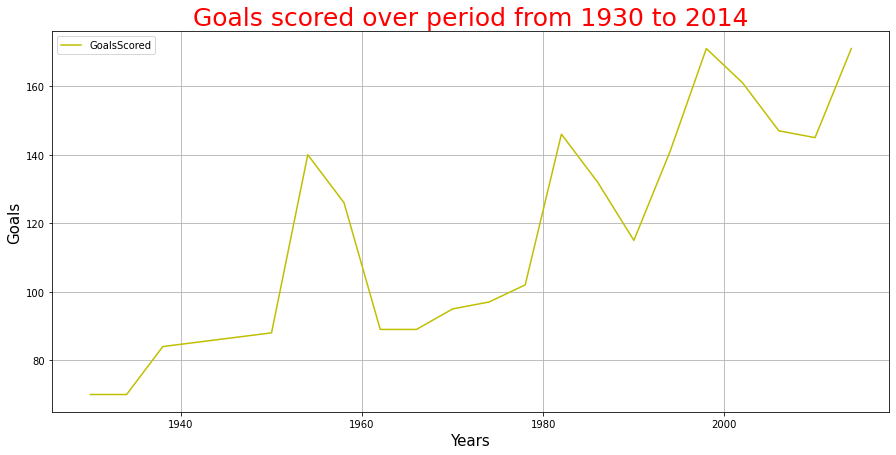

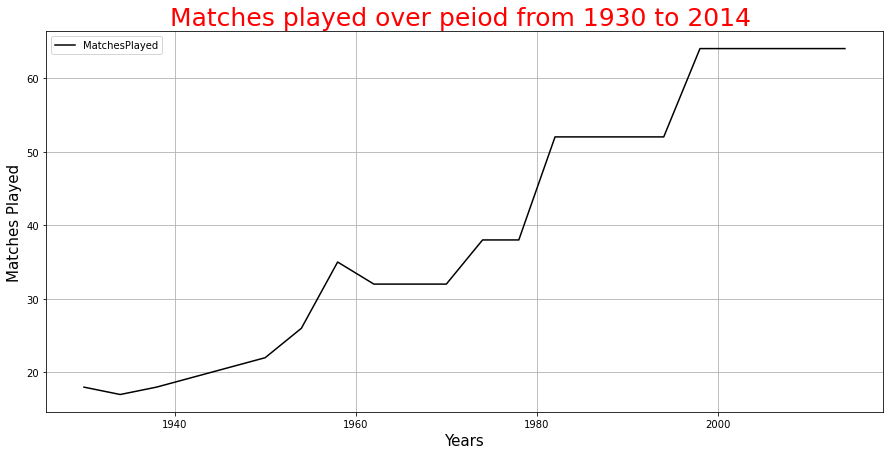

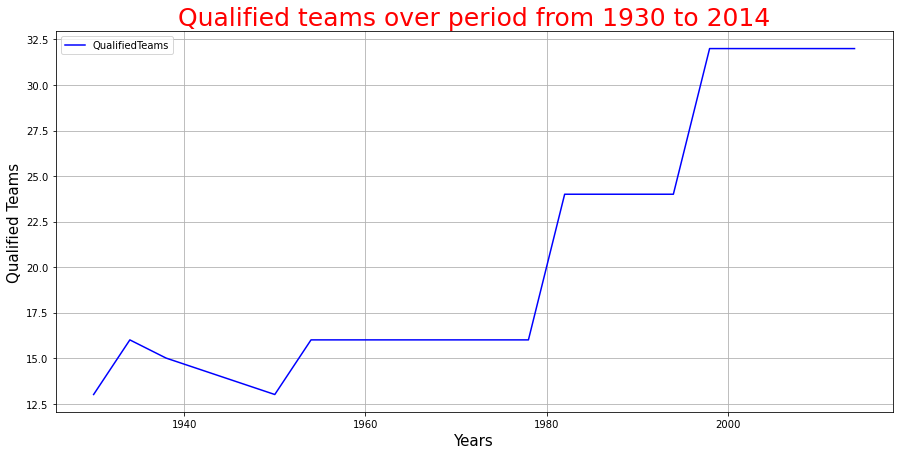

In [10]:
dt.plot(kind='line', x = "Year",y = "GoalsScored", 
        color = "y",grid = True,figsize = (15,7))# I plotted first graph using grid,yellow color and its size is 15:7
plt.title("Goals scored over period from 1930 to 2014",color='r',size='25') ## itle of graph is Goals scored over period from 1930 to 2014
plt.xlabel('Years',size='15')
plt.ylabel('Goals',size='15')

dt.plot(kind='line', x = "Year",y = "MatchesPlayed", 
        color = 'black',grid = True,figsize = (15,7))# I plotted first graph using grid, black color and its size is 15:7
plt.title("Matches played over peiod from 1930 to 2014 ",color='r',size='25') ## Title of graph is Matches Played over period from 1930 to 2014
plt.xlabel('Years',size='15')
plt.ylabel('Matches Played',size='15')

dt.plot(kind='line', x = "Year",y = "QualifiedTeams", 
        color = 'b',grid = True,figsize = (15,7)) # I plotted first graph using grid,blue color and its size is 15:7
plt.title("Qualified teams over period from 1930 to 2014",color='r',size='25') ## Title of graph is Qualified teams over period from 1930 to 2014
plt.xlabel('Years',size='15')
plt.ylabel('Qualified Teams',size='15')

plt.show()




## Findings and comments to RQ2:
On the Figure above we can see three graphs. On the first graph minimum number of goals was scored in 1930 while maximum number of goals was scored in 2014. So, year by year total number of goals scored increasing, but in 1964 and 1990 years there was sharp decline on this indicator.
On the second graph we can see total mathces played over this period. We can surely say that this indicator depends on the number of national teams participated.So, we know that number of national teams increased year by year. Tht is why graph is gradually increasing from 1930 to 2014.
On the last graph we can see qualified teams over this period. So, from 1930 to 1974 number of qualified teams did not change.In 1984 this indicator get to 24. Also, in 1996 number of teams consisted 32.

### Research question 4

#### 4. Does it affect the home team to win the league match?
In our dataset we have data about goals scored at home and away. So, in every match there must be home team which plays with their home kids and in many cases they are considered to be favorite of the match. So, I decided to compare statistics of home and away teams. 

In [11]:
Home=dr.groupby('Year') ## used to group Home goals by column "Year"
Away=dr.groupby('Year') ## used to group Away goals by column "Year"

<ipython-input-12-0c6b985df9ed>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HA=Home['Home Team Goals', 'Away Team Goals'].sum() ## HA is a variable that sums Goals scored at home and away


Text(0.5, 1.0, 'Comparing goals at home and away')

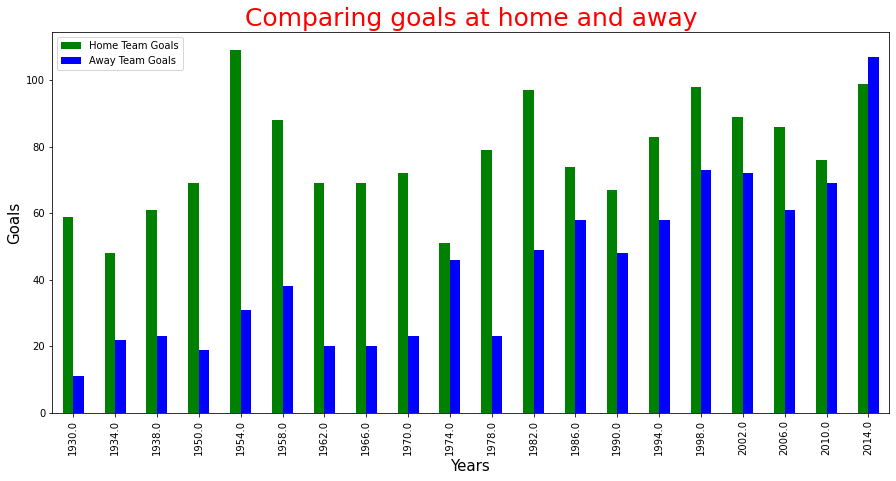

In [12]:
HA=Home['Home Team Goals', 'Away Team Goals'].sum() ## HA is a variable that sums Goals scored at home and away
HA.plot(y=['Home Team Goals', 'Away Team Goals'], kind="bar", color=['green', 'blue'], figsize=(15, 7)) ## It plots a graph for HA
plt.xlabel('Years',size='15') ## Label X axis as Years
plt.ylabel('Goals',size='15') ## Label Y axis as Goals
plt.title('Comparing goals at home and away',color='r',size='25') ## Title of my barchart and as usual used red color to title 

## Findings and comments to RQ4:

On the figure above we can see home and away teams goals scored in each World Cup. We can see that from 1930 to 2010 home teams scored more than away teams. Only in 2014 away teams score more that home teams.It shows that, being home team is one of the main factor of winning a game. 

### Research question 5

#### 5. Which referees have judged the World Cup more than others?
Another data that we have in our database is referees.Considering the fact that result of every match is depend on referees, I decided to count referees from our database. For that, first thing that I do is using count function from column Referee and plot a barchart of matches and referees. 

In [31]:
Refer = dr["Referee"].value_counts().reset_index() ## Refer is a variavle that counts Referee match from every match
Refer = Refer.sort_values(by="Referee",ascending=False) ## So, we sort values by descending order 

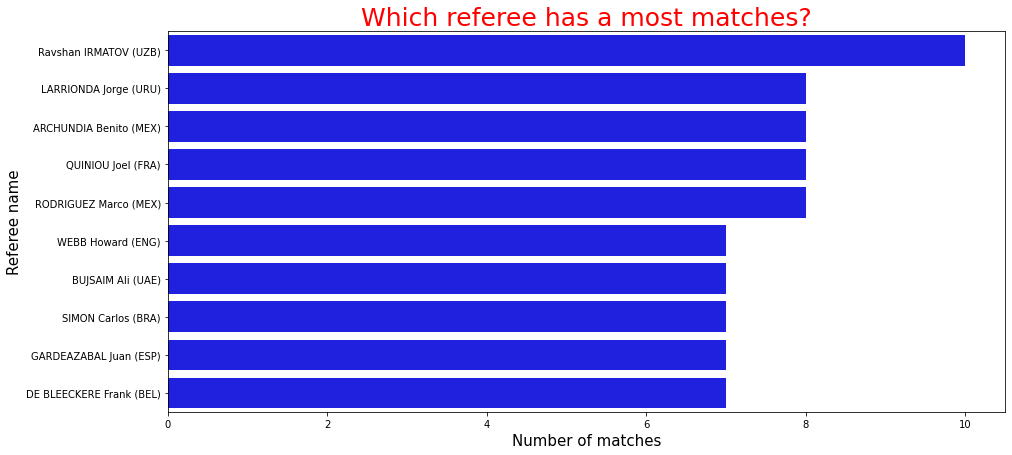

In [32]:
plt.figure(figsize=(15,7)) ## figure size is 15:7
sns.barplot("Referee","index",data=Refer[:10],color='b') ## We plot a barchart and limit only 10 referee 
plt.xlabel("Number of matches",size='15') ## Label the x axis as a number of matches
plt.ylabel("Referee name",size='15') ## label the y axis as a referee name   
plt.title("Which referee has a most matches?",color='r',size='25') ## Tile of the plot is Which referee has a most number of matches? 
plt.show()

## Findings and comments to RQ5:

So, from the barchart above we can see that Ravshan Irmatov from Uzbekistan was an official referee of World Cup matches for 10 times and this is the best result.Also, we see that most of the referee that have more matches are from Europe and South America

## Conclusion

From this analysis, we can understand that year after year the World Cup is becoming more popular, because from 1930 to 2014 all indicators including stadium attendance, the number of national teams, and even goals scored grew. This is due to the fact that the popularity of football has swept the whole world. There is some evidence of this from our dataset. For example, at the end of the first research question, I predicted that previously only the teams of Europe and South America participated in the final rounds of the World Cup. And the rest of the teams, including the developing countries of Asia and Africa, could not participate in this. But, after many years, we began to often see the national teams of Africa or Asia in the group stages of the World Cup.